# Імпорт модулів

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження файлу даних

In [252]:
df = pd.read_csv("2017_jun_final.csv")

## 1. Вивести перші рядки таблиці за допомогою методу `head`

In [253]:
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


## Визначте кількість рядків та стовпців у датафреймі

In [254]:
rows, columns = df.shape
print("Кількість рядків: ", rows)
print("Кількість стовбців: ", columns)

Кількість рядків:  8704
Кількість стовбців:  25


## Замініть у таблиці значення "—" на значення NaN

In [255]:
REPALACE_SYMBOL = '—'
if REPALACE_SYMBOL in df.values:
    # Если есть "-", замените их на NaN и выведите количество замен
    df.replace(REPALACE_SYMBOL, np.nan, inplace=True)
    count_replacements = df.isna().sum()
    print("Кількість замін:", count_replacements)
else:
    print(f"У DataFrame немає {REPALACE_SYMBOL} для заміни.")

У DataFrame немає — для заміни.


## Визначте типи всіх стовпців за допомогою `dataframe.dtypes`

In [256]:
column_types = df.dtypes
print(column_types)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

## Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [257]:
# ? Так немає ж. або замінені в попередньому завданні

## Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи `isnull` та `sum`)

In [258]:
missing_percentage = df.isnull().mean().round(2) * 100
print(missing_percentage)

N                                     0.0
Должность                             0.0
Язык.программирования                44.0
Специализация                        83.0
Общий.опыт.работы                     0.0
Опыт.работы.на.текущем.месте          0.0
Зарплата.в.месяц                      0.0
Изменение.зарплаты.за.12.месяцев      0.0
Город                                 0.0
Размер.компании                       0.0
Тип.компании                          0.0
Пол                                   0.0
Возраст                               0.0
Образование                           0.0
Университет                           4.0
Еще.студент                           0.0
Уровень.английского                   0.0
Предметная.область                    3.0
Дата.заполнения                       0.0
User.Agent                            0.0
exp                                   0.0
current_job_exp                       0.0
salary                                0.0
Валюта                            

## Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [259]:
tmp = df[df.columns.difference(['Язык.программирования'])].isna().any()
df.drop(tmp.index[tmp], axis=1, inplace=True)

## Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [260]:
missing_percentage = df.isnull().mean().round(2) * 100
print(missing_percentage)

N                                    0.0
Должность                            0.0
Язык.программирования               44.0
Общий.опыт.работы                    0.0
Опыт.работы.на.текущем.месте         0.0
Зарплата.в.месяц                     0.0
Изменение.зарплаты.за.12.месяцев     0.0
Город                                0.0
Размер.компании                      0.0
Тип.компании                         0.0
Пол                                  0.0
Возраст                              0.0
Образование                          0.0
Еще.студент                          0.0
Уровень.английского                  0.0
Дата.заполнения                      0.0
User.Agent                           0.0
exp                                  0.0
current_job_exp                      0.0
salary                               0.0
dtype: float64


## Видаліть усі рядки у вихідній таблиці за допомогою методу `dropna`

In [261]:
df.dropna(inplace=True)

## Визначте новий розмір таблиці за допомогою методу shape

In [262]:
df.shape

(4854, 20)

## Створіть нову таблицю `python_data`, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування `Python`

In [263]:
python_data = df[df["Язык.программирования"] == "Python"]
python_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запорожье,до 50 человек,Аутсорсинговая,мужской,22,Незаконченное высшее,False,средний,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Киев,свыше 1000 человек,Аутсорсинговая,мужской,28,Среднее,False,средний,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,мужской,33,Высшее,False,выше среднего,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Киев,до 50 человек,Аутсорсинговая,мужской,22,Высшее,False,средний,12/07/2017 9:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


## Визначте розмір таблиці `python_data` за допомогою методу `shape`

In [264]:
python_data.shape

(207, 20)

## Використовуючи метод `groupby`, виконайте групування за стовпчиком "Посада"

In [265]:
grouped_python_data = python_data.groupby("Должность")

## Створіть новий `DataFrame`, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу `agg` і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [266]:
salary = grouped_python_data.agg({'Зарплата.в.месяц': ['min', 'max']})
salary

Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200

## Створіть функцію `fill_avg_salary`, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [267]:
def fill_avg_salary(row):
    return row.mean()


salary[('Зарплата.в.месяц', 'avg')] = salary.apply(fill_avg_salary, axis=1)
salary

Зарплата.в.месяц              
                                      min   max     avg
Должность                                              
Junior Software Engineer              100  1250   675.0
Senior Software Engineer             1300  9200  5250.0
Software Engineer                     500  5400  2950.0
System Architect                     3000  5000  4000.0
Technical Lead                       1425  6200  3812.5

## Створіть описову статистику за допомогою методу `describe` для нового товпчика.

In [268]:
stat = salary[('Зарплата.в.месяц', 'avg')].describe()
pd.DataFrame(stat.apply(lambda x: int(x)))

,Зарплата.в.месяц
,avg
count,5
mean,3337
std,1700
min,675
25%,2950
50%,3812
75%,4000
max,5250


## Збережіть отриману таблицю в `CSV` файл

In [269]:
salary.to_csv('salary.csv')

# Візуалізація

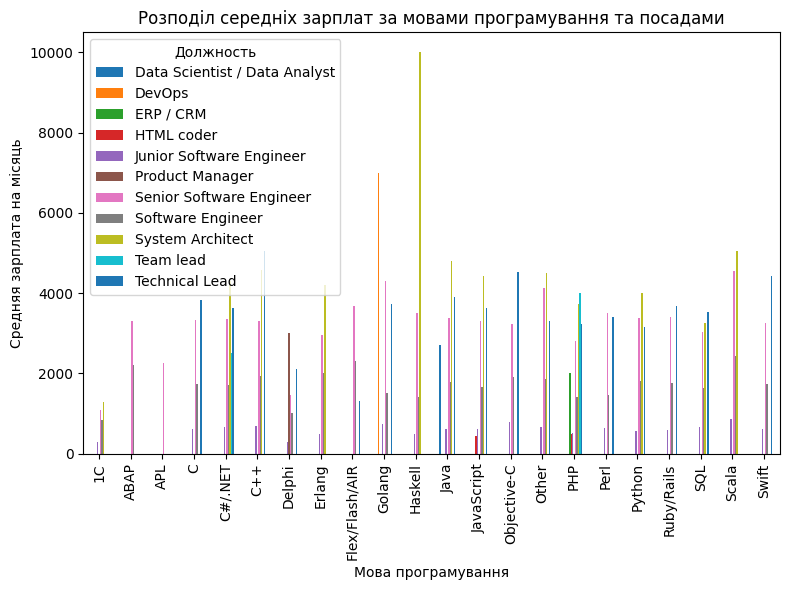

In [309]:
# Групуємо дані за мовами програмування та посадами, обчислюємо середню зарплату
grouped_data = df.groupby(['Язык.программирования', 'Должность'])['Зарплата.в.месяц'].mean().unstack()

# Побудова стовпчастої діаграми
plt.figure(figsize=(8, 6))  
grouped_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Мова програмування')
plt.ylabel('Средняя зарплата на місяць')
plt.title('Розподіл середніх зарплат за мовами програмування та посадами')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

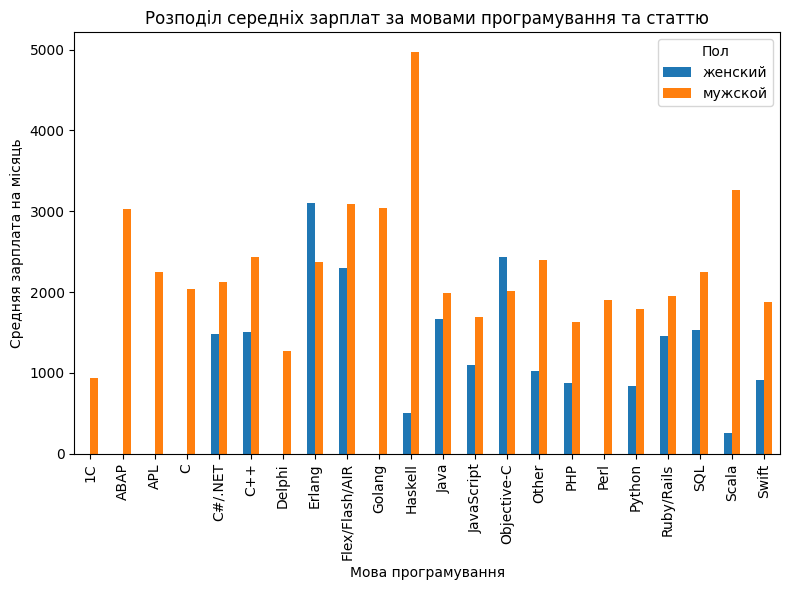

In [310]:
# Групуємо дані за статтю та мовою програмування, обчислюємо середню зарплату
grouped_data = df.groupby(['Язык.программирования', 'Пол'])['Зарплата.в.месяц'].mean().unstack()

# Побудова стовпчастої діаграми
plt.figure(figsize=(8, 6))  
grouped_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Мова програмування')
plt.ylabel('Средняя зарплата на місяць')
plt.title('Розподіл середніх зарплат за мовами програмування та статтю')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

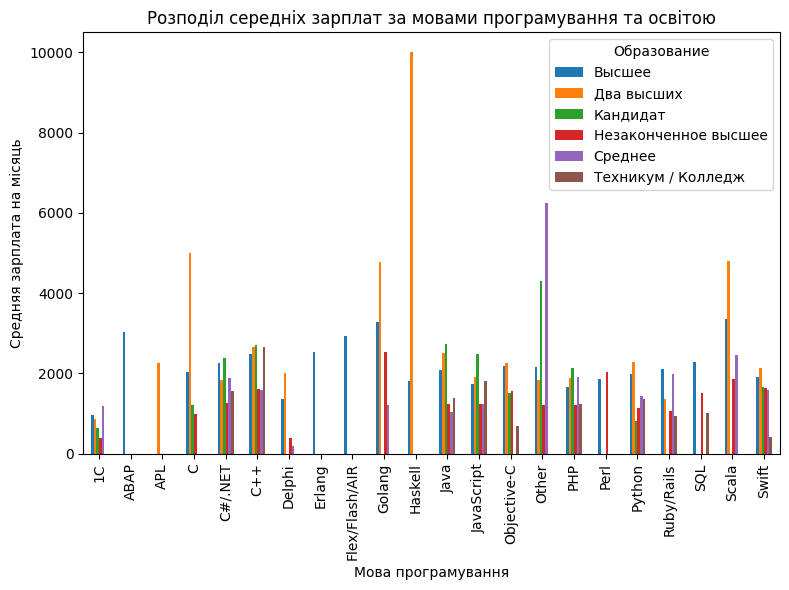

In [311]:
# Групуємо дані за освітою та мовою програмування, обчислюємо середню зарплату
grouped_data = df.groupby(['Язык.программирования', 'Образование'])['Зарплата.в.месяц'].mean().unstack()

# Побудова стовпчастої діаграми
plt.figure(figsize=(8, 6))  
grouped_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Мова програмування')
plt.ylabel('Средняя зарплата на місяць')
plt.title('Розподіл середніх зарплат за мовами програмування та освітою')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

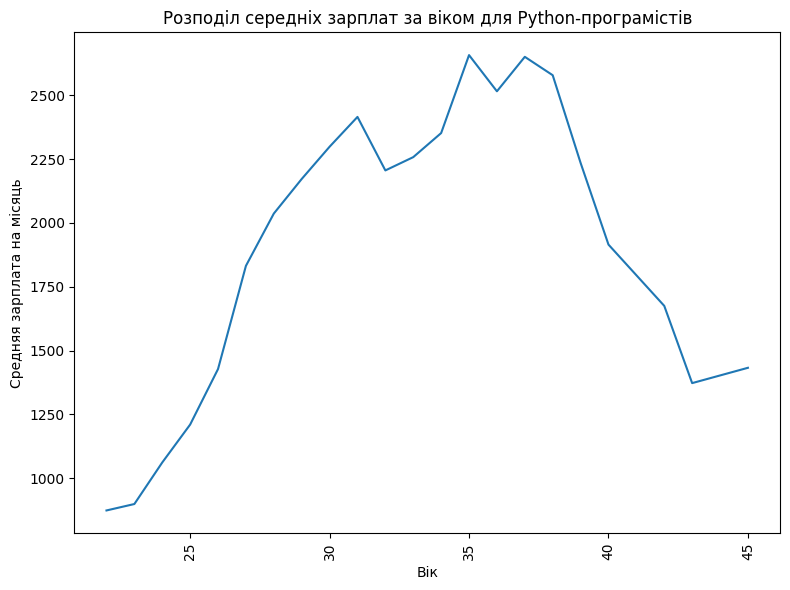

In [328]:
# Групуємо дані за віком для мови програмування Python, обчислюємо середню зарплату
grouped_data = df[df['Язык.программирования'] == 'Python'].groupby(['Возраст'])['Зарплата.в.месяц'].mean()

# Побудова стовпчастої діаграми
plt.figure(figsize=(8, 6))  
grouped_data.rolling(window=5).mean().plot(kind='line', ax=plt.gca())
plt.xlabel('Вік')
plt.ylabel('Средняя зарплата на місяць')
plt.title('Розподіл середніх зарплат за віком для Python-програмістів')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

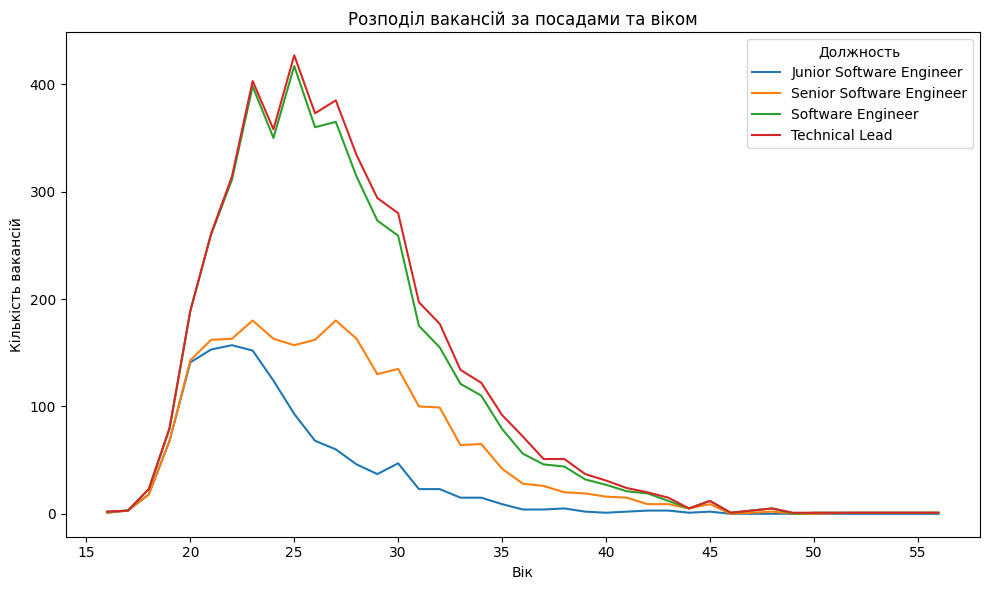

In [338]:
# Фільтрація даних для декількох посад
positions = ['Junior Software Engineer', 'Senior Software Engineer', 'Software Engineer', 'Technical Lead']
filtered_data = df[df['Должность'].isin(positions)]

# Групування даних за віком і посадою та підрахунок кількості записів
grouped_data = filtered_data.groupby(['Возраст', 'Должность']).size().unstack().fillna(0)

# Побудова графіка розподілу посад за віком
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line', ax=plt.gca(), stacked=True)
plt.xlabel('Вік')
plt.ylabel('Кількість вакансій')
plt.title('Розподіл вакансій за посадами та віком')
plt.tight_layout()
plt.legend(title='Должность')
plt.show()
